# Linear Regression 

Written by Deborah Won for EE 5830
California State University, Los Angeles

First, we will be getting the data into a Pandas dataframe. 

In [1]:
import pandas as pd

# load pre-processed data with observed values
data_source = "vehicles.csv" 

# Format data into a Pandas dataframe
fuel_economy = pd.read_csv(data_source, low_memory=False)
print(type(fuel_economy))


<class 'pandas.core.frame.DataFrame'>


In [2]:
# Find out what fields are in the data
fuel_economy.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [3]:

print(fuel_economy['charge120'])
fuel_economy.head(5)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39544    0.0
39545    0.0
39546    0.0
39547    0.0
39548    0.0
Name: charge120, Length: 39549, dtype: float64


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
# what does the engine displacement data look like? Just print out the values. What type of data is it?
feature = fuel_economy['displ']
print(type(feature))
feature = feature.values
print(type(feature))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [5]:
target = fuel_economy['UHighway']
target = target.values
print(type(target))
print(target.shape)

<class 'numpy.ndarray'>
(39549,)


# Prepare data for training

## The data needs to be preprocessed: 
### First put data in the right format (e.g., in L x 1 array)

In [6]:
# Split data into training and testing data, using 30% for testing.
from sklearn.model_selection import train_test_split

In [72]:
xTrain, xTest, yTrain, yTest = train_test_split(feature, target, train_size=0.7)

## Create the linear regression model, and try to fit the training data
### what errors do you run into?

In [9]:
# import the necessary package(s)
from sklearn.linear_model import LinearRegression



In [10]:
# Then create the model and fit the model
mileageModel = LinearRegression()
print(type(mileageModel))

<class 'sklearn.linear_model._base.LinearRegression'>


## Do more pre-processing to fix the error

In [46]:
# remove issue
print(xTrain.shape)
print(yTrain.shape)
xTrain = xTrain.reshape(-1, 1)
yTrain = yTrain.reshape(-1, 1)
print(xTrain.shape)
print(yTrain.shape)

(27684,)
(27684,)
(27684, 1)
(27684, 1)


In [21]:
import numpy as np

In [29]:
xTrain.shape
print(iKeep.shape)

(27684, 1)


In [47]:
iKeep = ~np.isnan(xTrain)
xTrain = xTrain[iKeep]
xTrain = xTrain.reshape(-1, 1)

In [48]:
yTrain = yTrain[iKeep]
yTrain = yTrain.reshape(-1, 1)

In [50]:
sum(np.isnan(yTrain))

array([0])

In [49]:
sum(np.isnan(xTrain))

array([0])

# Apply the linear regression model

In [32]:
print(xTrain.shape)
print(yTrain.shape)

(27567, 1)
(27684, 1)


In [51]:
# apply the model
mileageModel.fit(xTrain, yTrain)

LinearRegression()

In [55]:
# look at how the model fit the data
# y = theta1*x + theta0

theta1 = mileageModel.coef_
theta0 = mileageModel.intercept_

print(theta1, theta0)

[[-4.57512787]] [48.74311781]


In [58]:
# find predicted gas mileage vale when eng displacemnt = 5.2
yhat = theta1*5.2 + theta0
print(yhat)

[[24.95245288]]


# Evaluate performance of model

First find R^2 value.  Then find the mean squared error.  Finally, plot the data and the fit line.

In [73]:
iKeep = ~np.isnan(xTest)
xTest = xTest[iKeep].reshape(-1,1)

In [74]:
yTest = yTest[iKeep]

In [76]:
yhat = mileageModel.predict(xTest)

In [81]:
yhat.shape

(11818, 1)

In [84]:
np.isnan(yhat).any()

False

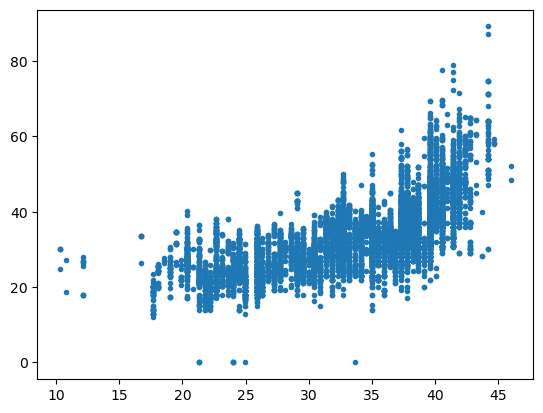

In [86]:
import matplotlib.pyplot as plt
plt.plot(yhat, yTest, '.')

In [87]:
# What was the R^2 value?
mileageModel.score(yhat, yTest)

-261.1748722019088

In [89]:
# What was the mean squared error?
from sklearn.metrics import mean_squared_error

In [90]:
mean_squared_error(yhat, yTest)

39.042215885644644

In [ ]:
# Can you write the equation of the fit line?
# What size array do you expect the coefficients to be?


In [ ]:
# First plot the original data, and see how the fit line goes through the data.
# Then check that the predicted values (yhat) fall along that line


# Multiple Linear Regression
Create a MMSE linear regression model for Highway mileage as a function of engine displacement and city08 mileage.  
Pretend UHighway = Blood glucose levels, displ = daily # of calories, city08 = 

In [ ]:
# create the features
features = np.array([fuel_economy.displ, fuel_economy.city08])

In [ ]:
# create the target

In [ ]:
# use numpy's delete function to remove any invalid samples

In [ ]:
# now split the data

## Create the MLR model

# Fit the data 

## Test the model

## make sure you understand the model

In [ ]:
# What shape should the coef array be? 

In [ ]:
# use Axes3D from the mpl_toolkits.mplot3d package

In [ ]:
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set


In [ ]:
# create x,y
xx, yy = np.meshgrid(range(np.max(features[:,0])), range(np.max(features[:,1])))

# calculate corresponding z


In [ ]:
# Create the 3d plot 
plt3d = plt.figure().gca(projection='3d')

# Plot the model (the plane) using a surface plot
plt3d.plot_surface(xx, yy, z, alpha=0.2)

# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()

# create the scatter plot
